## MHC-I data from MHCflurry 2.0 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

df_qual = pd.read_csv('/projects/0/einf2380/data/external/unprocessed/pMHCI/20210521_qualitative.csv')
print(len(df_qual))

df_quant = pd.read_csv('/projects/0/einf2380/data/external/unprocessed/pMHCI/20210521_quantitative.csv')
print(len(df_quant))

df_cur_add = pd.read_csv('/projects/0/einf2380/data/external/unprocessed/pMHCI/curated_training_data.csv')
print(len(df_cur_add))
print((len(df_qual) + len(df_quant)))

df_cur = pd.read_csv('/projects/0/einf2380/data/external/unprocessed/pMHCI/curated_training_data.no_additional_ms.csv')
print(len(df_cur))


599112
125794
748115
724906
598450


In [2]:
set(df_cur['measurement_kind'])

{'affinity', 'mass_spec'}

354629 20587
63132 160102


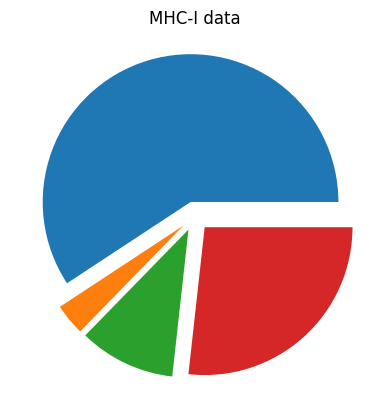

<Figure size 640x480 with 0 Axes>

In [3]:
ms = df_cur[df_cur['measurement_kind'] == 'mass_spec']

ms_pos = ms[ms['measurement_value'] <= 500.]
ms_neg = ms[ms['measurement_value'] > 500.]

print(len(ms_pos), len(ms_neg))

ba = df_cur[df_cur['measurement_kind'] == 'affinity']

ba_pos = ba[ba['measurement_value'] <= 500.]
ba_neg = ba[ba['measurement_value'] > 500.]

print(len(ba_pos), len(ba_neg))

plt.pie([len(ms_pos), len(ms_neg), len(ba_pos), len(ba_neg)],
    #labels=[f'MS pos: {len(ms_pos)}', f'MS neg: {len(ms_neg)}',
    #        f'BA pos: {len(ba_pos)}', f'BA neg: {len(ba_neg)}',],
    explode=[0.1, 0.1, 0.1, 0.1],)# autopct='%1.1f%%',  textprops={'fontsize': 14})
plt.title('MHC-I data')

plt.savefig('mhci.pdf')
plt.show()
plt.clf()

## MHC-II data from NetMHCIIpan

In [4]:
colnames=['peptide', 'label', 'allele', '???']

df_ba_test = pd.read_csv('/projects/0/einf2380/data/external/unprocessed/pMHCII/test_BA1.txt', names=colnames, delimiter='\t', header=None)

df_ba_train = pd.read_csv('/projects/0/einf2380/data/external/unprocessed/pMHCII/train_BA1.txt', names=colnames, delimiter='\t', header=None)

df_ba = pd.concat([df_ba_test, df_ba_train], ignore_index=True)

df_ms_test = pd.read_csv('/projects/0/einf2380/data/external/unprocessed/pMHCII/test_EL1.txt', names=colnames, delimiter='\t', header=None)

df_ms_train = pd.read_csv('/projects/0/einf2380/data/external/unprocessed/pMHCII/train_EL1.txt', names=colnames, delimiter='\t', header=None)

df_ms = pd.concat([df_ms_test, df_ms_train], ignore_index=True)

df_all = pd.concat([ df_ba, df_ms])

NameError: name 'p' is not defined

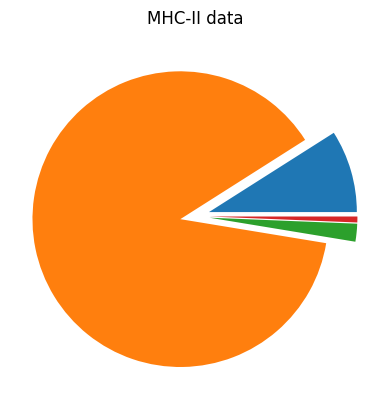

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np

df_ba['affinity'] = df_ba['label'].apply(lambda x: np.exp(x * np.log(50000)))

ba_pos = df_ba[df_ba['affinity'] <= 500.]
ba_neg = df_ba[df_ba['affinity'] > 500.]

ms_pos = df_ms[df_ms['label'] == 1]
ms_neg = df_ms[df_ms['label'] == 0]

# data = [len(ms_pos), len(ms_neg), len(ba_pos), len(ba_neg)]
# labels=[f'MS pos: {len(ms_pos)}', f'MS neg: {len(ms_neg)}',
#         f'BA pos: {len(ba_pos)}', f'BA neg: {len(ba_neg)}',]

# fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
# wedges, texts = ax.pie(data, startangle=0)

# bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
# kw = dict(arrowprops=dict(arrowstyle="-"),
#           bbox=bbox_props, zorder=0, va="center")

# for i, p in enumerate(wedges):
#     ang = (p.theta2 - p.theta1)/2. + p.theta1
#     y = np.sin(np.deg2rad(ang))
#     x = np.cos(np.deg2rad(ang))
#     horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
#     connectionstyle = f"angle,angleA=0,angleB={ang}"
#     kw["arrowprops"].update({"connectionstyle": connectionstyle})
#     ax.annotate(labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
#                 horizontalalignment=horizontalalignment, **kw)

# ax.set_title('MHC-II data')

plt.pie([len(ms_pos), len(ms_neg), len(ba_pos), len(ba_neg)],
    #labels=[f'MS pos: {len(ms_pos)}', f'MS neg: {len(ms_neg)}',
    #        f'BA pos: {len(ba_pos)}', f'BA neg: {len(ba_neg)}',],
    explode=[0.1, 0.1, 0.1, 0.1],)# autopct='%1.1f%%', textprops={'fontsize': 14})

plt.title('MHC-II data')

plt.savefig('mhcii.pdf')
plt.show()
plt.clf()

In [ ]:
df_ba

,peptide,label,allele,???,affinity
0,AAASVPAADKFKTFE,0.203668,HLA-DPA10103-DPB10201,XXXAAATFEXXX,9.057948
1,APEVKYTVFETALKK,0.838333,HLA-DPA10103-DPB10201,XXXAPELKKXXX,8695.641382
2,ATFEAMYLGTCKTLT,0.325328,HLA-DPA10103-DPB10201,XXXATFTLTXXX,33.783646
3,ATVATAPEVKYTVFE,0.632531,HLA-DPA10103-DPB10201,XXXATVVFEXXX,938.089329
4,AVWVDGKARTAWVDS,0.147830,HLA-DPA10103-DPB10201,XXXAVWVDSXXX,4.950496
...,...,...,...,...,...
108954,RLKGRSCDDWLGGSV,0.134239,H-2-IEd,XXXRLKGSVXXX,4.273513
108955,YLEDARRLKAIYEKKK,0.523265,H-2-IEd,XXXYLEKKKXXX,287.611694
108956,AAIAAAKAAARAA,0.476026,H-2-IEk,XXXAAIRAAXXX,172.516999
108957,YLEDARRLKAIYEKKK,0.653817,H-2-IEk,XXXYLEKKKXXX,1181.045071
